In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv('county_mobility_report.csv')
data.head()

,STATE,COUNTY,date,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME
0,Alabama,Autauga County,2/15/20,5.0,7.0,NaN,NaN,-4.0,NaN
1,Alabama,Autauga County,2/16/20,0.0,1.0,-23.0,NaN,-4.0,NaN
2,Alabama,Autauga County,2/17/20,8.0,0.0,NaN,NaN,-27.0,5.0
3,Alabama,Autauga County,2/18/20,-2.0,0.0,NaN,NaN,2.0,0.0
4,Alabama,Autauga County,2/19/20,-2.0,0.0,NaN,NaN,2.0,0.0


In [3]:
data["Label"] = data["WORK"].shift(-1)

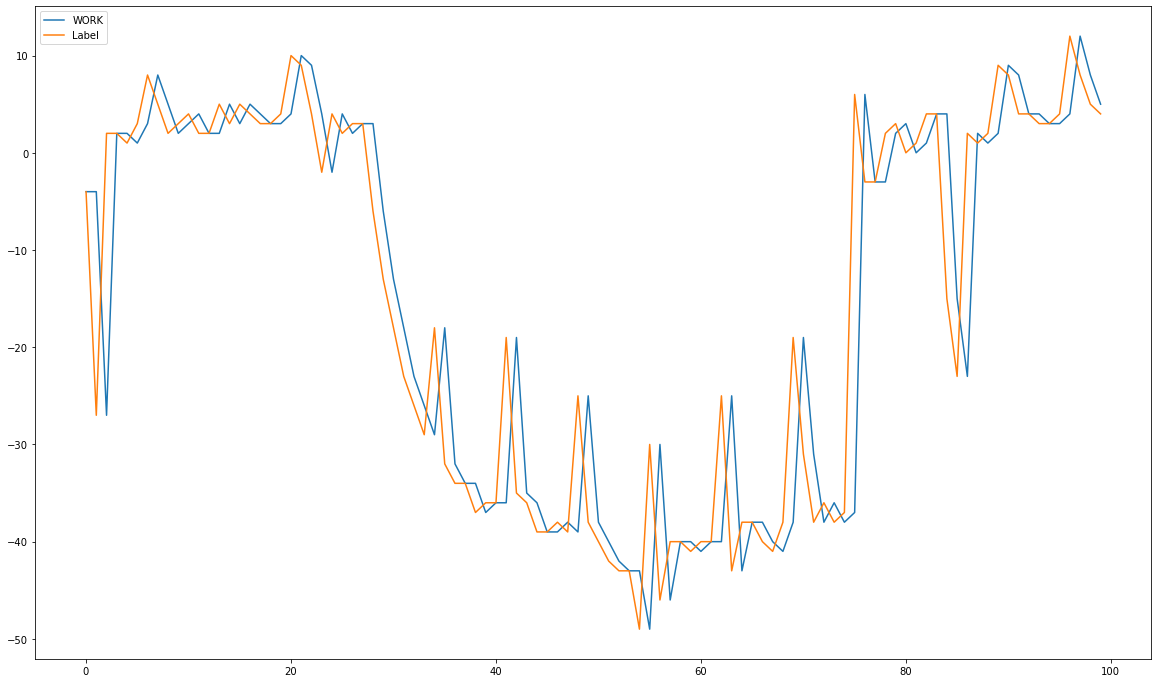

In [4]:
data[["WORK", "Label"]].iloc[:100].plot(figsize=(20,12));

In [5]:
#data.dropna(inplace=True)
data.tail()

,STATE,COUNTY,date,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME,Label
201686,Wyoming,Weston County,4/24/20,NaN,NaN,NaN,NaN,-29.0,NaN,-35.0
201687,Wyoming,Weston County,4/27/20,NaN,NaN,NaN,NaN,-35.0,NaN,-38.0
201688,Wyoming,Weston County,4/28/20,NaN,NaN,NaN,NaN,-38.0,NaN,-42.0
201689,Wyoming,Weston County,4/29/20,NaN,NaN,NaN,NaN,-42.0,NaN,-39.0
201690,Wyoming,Weston County,4/30/20,NaN,NaN,NaN,NaN,-39.0,NaN,NaN


In [6]:
df = pd.DataFrame()
df["Work"] = data["WORK"]
df["label"] = data["Label"]
df.dropna(inplace=True)
df

,Work,label
0,-4.0,-4.0
1,-4.0,-27.0
2,-27.0,2.0
3,2.0,2.0
4,2.0,1.0
...,...,...
201685,-34.0,-29.0
201686,-29.0,-35.0
201687,-35.0,-38.0
201688,-38.0,-42.0


In [8]:
# 70% train, 10% val, 20% test

train_i = int(len(df.index) * 0.7)
val_i = int(len(df.index) * 0.8)

train_x = df["Work"].iloc[:train_i].to_numpy()
train_y = df["label"].iloc[:train_i].to_numpy()

val_x = df["Work"].iloc[train_i:val_i].to_numpy()
val_y = df["label"].iloc[train_i:val_i].to_numpy()

test_x = df["Work"].iloc[val_i:].to_numpy()
test_y = df["label"].iloc[val_i:].to_numpy()

# df["column"] => pd series,  df["column", "column2"] is wrong
# df[["column"]] =>pd Dataframe, df[["column", "column2"]] is right

print(train_x.shape)
print(train_x)
print(train_y)

(131212,)
[ -4.  -4. -27. ... -24. -24. -28.]
[ -4. -27.   2. ... -24. -28. -30.]


In [21]:
#(sample, input_shape = features)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
epochs = 100
#learning_rate = 0.0001

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
                           #loss=tf.keras.losses.MeanSquaredError(),
              metrics = ['acc'])
             #metric=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [23]:
#model.fit(train_x, train_y, epochs=100)
model.fit(
    train_x,
    train_y,
    epochs=epochs,
    validation_data = (val_x,val_y)
)

Train on 131212 samples, validate on 18745 samples
Epoch 1/100
131212/131212 [==============================] - 6s 45us/sample - loss: 102.0628 - acc: 0.0441 - val_loss: 62.9669 - val_acc: 0.0519
Epoch 2/100
131212/131212 [==============================] - 6s 44us/sample - loss: 67.4452 - acc: 0.0451 - val_loss: 62.5820 - val_acc: 0.0519
Epoch 3/100
131212/131212 [==============================] - 7s 53us/sample - loss: 67.0780 - acc: 0.0451 - val_loss: 62.7664 - val_acc: 0.0519
Epoch 4/100
131212/131212 [==============================] - 7s 55us/sample - loss: 66.9298 - acc: 0.0450 - val_loss: 62.2858 - val_acc: 0.0519
Epoch 5/100
131212/131212 [==============================] - 7s 52us/sample - loss: 66.8767 - acc: 0.0450 - val_loss: 62.2956 - val_acc: 0.0519
Epoch 6/100
131212/131212 [==============================] - 7s 55us/sample - loss: 66.8425 - acc: 0.0446 - val_loss: 61.8495 - val_acc: 0.0519
Epoch 7/100
131212/131212 [==============================] - 8s 61us/sample - loss: 

131212/131212 [==============================] - 10s 75us/sample - loss: 66.8068 - acc: 0.0449 - val_loss: 61.9005 - val_acc: 0.0519
Epoch 57/100
131212/131212 [==============================] - 7s 55us/sample - loss: 66.7885 - acc: 0.0446 - val_loss: 62.1275 - val_acc: 0.0519
Epoch 58/100
131212/131212 [==============================] - 7s 52us/sample - loss: 66.7986 - acc: 0.0449 - val_loss: 61.8259 - val_acc: 0.0519
Epoch 59/100
131212/131212 [==============================] - 9s 70us/sample - loss: 66.7858 - acc: 0.0448 - val_loss: 62.0025 - val_acc: 0.0519
Epoch 60/100
131212/131212 [==============================] - 10s 73us/sample - loss: 66.7891 - acc: 0.0448 - val_loss: 61.7894 - val_acc: 0.0519
Epoch 61/100
131212/131212 [==============================] - 9s 72us/sample - loss: 66.7887 - acc: 0.0451 - val_loss: 61.8585 - val_acc: 0.0519
Epoch 62/100
131212/131212 [==============================] - 10s 75us/sample - loss: 66.8195 - acc: 0.0450 - val_loss: 62.1691 - val_acc: 0.